<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Create-dataset-after-removing-location-and-time-data" data-toc-modified-id="Create-dataset-after-removing-location-and-time-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Create dataset after removing location and time data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Baseline-Accuracy" data-toc-modified-id="Baseline-Accuracy-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Baseline Accuracy</a></span></li></ul></li><li><span><a href="#Functions-to-fit-and-evaluate-models" data-toc-modified-id="Functions-to-fit-and-evaluate-models-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Functions to fit and evaluate models</a></span></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Naive-Bayes-Classifier" data-toc-modified-id="Naive-Bayes-Classifier-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Naive Bayes Classifier</a></span><ul class="toc-item"><li><span><a href="#Support-Vector-Machines" data-toc-modified-id="Support-Vector-Machines-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Support Vector Machines</a></span><ul class="toc-item"><li><span><a href="#Support-Vector-Machine-model-doesn't-scale-very-well-on-large-datasets.-So-I-will-try-Linear-SVC" data-toc-modified-id="Support-Vector-Machine-model-doesn't-scale-very-well-on-large-datasets.-So-I-will-try-Linear-SVC-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Support Vector Machine model doesn't scale very well on large datasets. So I will try Linear SVC</a></span></li></ul></li></ul></li><li><span><a href="#Stochastic-Gradient-Descent" data-toc-modified-id="Stochastic-Gradient-Descent-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Stochastic Gradient Descent</a></span></li><li><span><a href="#K-Nearest-Neighbors" data-toc-modified-id="K-Nearest-Neighbors-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>K Nearest Neighbors</a></span></li><li><span><a href="#Deep-Learning-with-Neural-Networks" data-toc-modified-id="Deep-Learning-with-Neural-Networks-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Deep Learning with Neural Networks</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Deep-learning-with-Multi-Layer-Perceptron-hidden-layers-of-(2,1)-gave-the-best-results.-I'll-evaluate-this-model-here." data-toc-modified-id="Deep-learning-with-Multi-Layer-Perceptron-hidden-layers-of-(2,1)-gave-the-best-results.-I'll-evaluate-this-model-here.-6.0.1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>Deep learning with Multi-Layer Perceptron hidden layers of (2,1) gave the best results. I'll evaluate this model here.</a></span></li></ul></li><li><span><a href="#Scores" data-toc-modified-id="Scores-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Scores</a></span></li><li><span><a href="#Confusion-Matrix-and-Classification-Reports" data-toc-modified-id="Confusion-Matrix-and-Classification-Reports-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Confusion Matrix and Classification Reports</a></span></li><li><span><a href="#Plot-Precision-Recall-and-ROC-curves" data-toc-modified-id="Plot-Precision-Recall-and-ROC-curves-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Plot Precision-Recall and ROC curves</a></span></li></ul></li></ul></div>

# Modeling without location and time data

In [1]:
import pandas as pd
import numpy as np

import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import LinearSVC

from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix,confusion_matrix, accuracy_score, classification_report

import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", 3))


import joblib
import pickle

## Create dataset after removing location and time data 
The resulting dataset will contain tf-idf vectorized words, tweet sentiment and tweet polarity

In [2]:
# Load the pickled csv files
# Uncomment the block.
X_train_all = pd.read_pickle('X_train.pkl')
X_test_all = pd.read_pickle('X_test.pkl')
y_train = pd.read_pickle('y_train.pkl')
y_test = pd.read_pickle('y_test.pkl')


In [3]:
del_col = [cols for cols in X_train_all.columns if ("Region" in cols or "Month" in cols or
                                                "Day" in cols or "Hour" in cols)]
X_train = X_train_all.drop(columns=del_col, axis=1).copy()
X_test = X_test_all.drop(columns=del_col, axis=1).copy()
print("Training dataset shape: {}, Test dataset shape: {}".format(X_train.shape, X_test.shape))

Training dataset shape: (69264, 4528), Test dataset shape: (17316, 4528)


In [4]:
X_train_all.head(3)

,Polarity,abs_pol,abandon,ability,able,abroad,absence,absolute,absolutely,abuse,...,Region_𓂀,Region_𝑩𝒓𝒊𝒙𝒕𝒐𝒏 𝑳𝒐𝒏𝒅𝒐𝒏,Region_𝕮𝖍𝖎𝖓𝖆𝕿𝖔𝖜𝖓 𝕷𝖔𝖓𝖉𝖔n,Region_𝗟𝗼𝗻𝗱𝗼𝗻 𝗘𝘀𝘀𝗲𝘅,Region_𝗡𝗢𝗧 in Wales right now,Region_𝙼𝚊𝚗𝚌𝚑𝚎𝚜𝚝𝚎𝚛 𝚄𝙺,Region_𝚖𝚊𝚗𝚌𝚑𝚎𝚜𝚝𝚎𝚛,Sentiment_-1,Sentiment_0,Sentiment_1
0,-0.741230,-0.633141,-0.029051,-0.035689,-0.093736,-0.036069,-0.024842,-0.054172,-0.084556,-0.046506,...,-0.0038,-0.0038,-0.0076,-0.0038,-0.0038,0.0,-0.0038,1.416099,-0.415971,-1.040313
1,-0.262475,-1.479113,-0.029051,-0.035689,-0.093736,-0.036069,-0.024842,-0.054172,-0.084556,-0.046506,...,-0.0038,-0.0038,-0.0076,-0.0038,-0.0038,0.0,-0.0038,1.416099,-0.415971,-1.040313
2,1.396220,1.374787,-0.029051,-0.035689,-0.093736,-0.036069,-0.024842,-0.054172,-0.084556,-0.046506,...,-0.0038,-0.0038,-0.0076,-0.0038,-0.0038,0.0,-0.0038,-0.706165,-0.415971,0.961249


#### Baseline Accuracy

In [5]:
# Baseline accuracy
y_train.value_counts(normalize=True)

0.0    0.59946
1.0    0.40054
Name: case_increase, dtype: float64

In [6]:
y_test.value_counts(normalize=True)

0.0    0.594248
1.0    0.405752
Name: case_increase, dtype: float64

The Baseline accuracy is 0.59. The test dataset has a similar class distribution as the training dataset.

# Modeling

### Functions to fit and evaluate models

In [29]:
# Fit model and return model, scores and parameters
def model_fitter(classifier, params):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)    
    model = GridSearchCV(classifier,params,cv=kf, verbose=2)
    model.fit(X_train, y_train)
    training_score = model.score(X_train, y_train)
    cv_score = model.best_score_
    test_score = model.score(X_test, y_test)
    return training_score,cv_score,test_score, model.best_params_, model.best_estimator_


# create and update dataframe with model scores
scores = pd.DataFrame(columns=["Training score","Mean crossvalidated score", "Test score","Parameters"])
def compare_scores(model_name, model_scores):
    
    scores.loc[model_name] = model_scores
    
# Evaluate model using classification reports and confusion matrices
def evaluate(model):
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    
    # print classification report
    print(classification_report(y_train, predictions_train))
    print(classification_report(y_test, predictions_test))
    
    # plot confusion matrix
    fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(12, 4), sharey=True)
    
    plot_confusion_matrix(model, X_train, y_train, cmap='Blues', ax=ax[0][0], normalize='true',colorbar=False)
    plot_confusion_matrix(model, X_test, y_test, cmap='Blues', ax=ax[1][0], normalize='true',colorbar=False)
    plot_confusion_matrix(model, X_train, y_train, cmap='Blues', ax=ax[0][1],colorbar=False)
    plot_confusion_matrix(model, X_test, y_test, cmap='Blues', ax=ax[1][1],colorbar=False)

# Plot Precision-Recall curves and ROC curves
def plot_curves(model):
    cmap = ListedColormap(sns.color_palette("husl", len(model.classes_)))

    fig, ax =plt.subplots(ncols = 2, nrows=2, figsize=(12, 12))
    probabilities_train = model.predict_proba(X_train)
    probabilities_test = model.predict_proba(X_test)

    #plot train data
    skplt.metrics.plot_precision_recall(y_train, probabilities_train, cmap=cmap, ax=ax[0][0])
    skplt.metrics.plot_roc(y_train, probabilities_train, cmap=cmap, ax=ax[0][1])

    #plot test data
    skplt.metrics.plot_precision_recall(y_test, probabilities_test, cmap=cmap, ax=ax[1][0])
    skplt.metrics.plot_roc(y_test, probabilities_test, cmap=cmap, ax=ax[1][1])

    plt.show()

# Get coefficients from model
def evaluate_coef(model):
    # create a dataframe to look at the coefficients and their values 
    coef_df = pd.DataFrame({'feature': X_train.columns,
                            'coef': model.coef_[0],
                            'abs_coef': np.abs(model.coef_[0])})

    # sort by absolute value of coefficient (magnitude)
    coef_df.sort_values('abs_coef', ascending=False, inplace=True)
    coef_df.head()
    
    # plot the most significant coefficients
    coef_df.head(20).plot(kind='barh', x='feature', y='coef', figsize=(12, 12))
    plt.show()

## Logistic Regression

In [16]:
# initiate Logistic Regression model and set parameters. 
#Call function to fit model and return scores, parameters and model

lr = LogisticRegression(warm_start=True,verbose = 2)

# optimizes the model for large datasets
lr_params = {
    'solver' :['saga'],
    'penalty' : ['l2']
            }
lr_train, lr_cv, lr_test, lr_params, lr_model = model_fitter(lr, lr_params)

# save model to joblib pickle
joblib.dump(lr_model, 'logreg_model.pkl')

# make list of training, cv, test scores and parameters
lr_scores = [lr_train,lr_cv, lr_test,lr_params]
lr_scores = [lr_train,lr_cv, lr_test,lr_params]
print("Train score: ", lr_train, "Cross-val score: ", lr_cv, "Test score: ", lr_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 137 seconds


/Users/sharadakumaran/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min finished


[CV] END ............................penalty=l2, solver=saga; total time= 2.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 145 seconds


/Users/sharadakumaran/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.4min finished


[CV] END ............................penalty=l2, solver=saga; total time= 2.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 167 seconds


/Users/sharadakumaran/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.8min finished


[CV] END ............................penalty=l2, solver=saga; total time= 3.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 144 seconds


/Users/sharadakumaran/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.4min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.4min finished


[CV] END ............................penalty=l2, solver=saga; total time= 2.6min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 138 seconds


/Users/sharadakumaran/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min finished


[CV] END ............................penalty=l2, solver=saga; total time= 2.5min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1, change: 1.00000000
Epoch 2, change: 0.17848537
Epoch 3, change: 0.11478327
Epoch 4, change: 0.07960135
Epoch 5, change: 0.07244494
Epoch 6, change: 0.03846028
Epoch 7, change: 0.03222071
Epoch 8, change: 0.03070468
Epoch 9, change: 0.02687619
Epoch 10, change: 0.02410615
Epoch 11, change: 0.02119686
Epoch 12, change: 0.01910679
Epoch 13, change: 0.01775216
Epoch 14, change: 0.01644508
Epoch 15, change: 0.01555219
Epoch 16, change: 0.01461711
Epoch 17, change: 0.01316673
Epoch 18, change: 0.01259569
Epoch 19, change: 0.01187024
Epoch 20, change: 0.01114750
Epoch 21, change: 0.01065201
Epoch 22, change: 0.01018803
Epoch 23, change: 0.00967933
Epoch 24, change: 0.00930878
Epoch 25, change: 0.00922428
Epoch 26, change: 0.00851040
Epoch 27, change: 0.00834489
Epoch 28, change: 0.00787619
Epoch 29, change: 0.00781448
Epoch 30, change: 0.00738688
Epoch 31, change: 0.00736689
Epoch 32, change: 0.00692396
Epoch 33, change: 0.00672886
Epoch 34, change: 0.00691068
Epoch 35, change: 0.006

Epoch 67, change: 0max_iter reached after 176 seconds


/Users/sharadakumaran/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.9min finished


Train score:  0.6579608454608454 Cross-val score:  0.58731806696271 Test score:  0.5855278355278355


## Naive Bayes Classifier
Run the Naive Bayes classifier on dataset standardised using MinMax Scaler. This is because the Naive Bayes Classifier accepts only positive values. The Standard Scaler creates a standardised dataset with negative values.

In [8]:
# Load the pickled csv files
# Uncomment the block.
X_train_mms = pd.read_pickle('X_train_mms.pkl')
X_test_mms = pd.read_pickle('X_test_mms.pkl')
y_train_mms = pd.read_pickle('y_train_mms.pkl')
y_test_mms = pd.read_pickle('y_test_mms.pkl')

In [9]:
from sklearn.naive_bayes import MultinomialNB

In [10]:
# delete columns relating to Region or Time data such as Month, Day and Hour
del_col = [cols for cols in X_train_mms.columns if ("Region" in cols or "Month" in cols or
                                                "Day" in cols or "Hour" in cols)]
X_train = X_train_mms.drop(columns=del_col, axis=1).copy()
X_test = X_test_mms.drop(columns=del_col, axis=1).copy()
print("Training dataset shape: {}, Test dataset shape: {}".format(X_train.shape, X_test.shape))

Training dataset shape: (69264, 4528), Test dataset shape: (17316, 4528)


In [ ]:
# Fit model and return model, scores and parameters
def model_fitter_nbc(classifier, params):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)    
    model = GridSearchCV(classifier,params,cv=kf, verbose=2)
    model.fit(X_train, y_train)
    training_score = model.score(X_train, y_train)
    cv_score = model.best_score_
    test_score = model.score(X_test, y_test)
    return training_score,cv_score,test_score, model.best_params_, model.best_estimator_


# create and update dataframe with model scores
scores = pd.DataFrame(columns=["Training score","Mean crossvalidated score", "Test score","Parameters"])
def compare_scores(model_name, model_scores):
    
    scores.loc[model_name] = model_scores
    
# Evaluate model using classification reports and confusion matrices
def evaluate(model):
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    
    # print classification report
    print(classification_report(y_train, predictions_train))
    print(classification_report(y_test, predictions_test))
    
    # plot confusion matrix
    fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(12, 4), sharey=True)
    print("Training Set")
    plot_confusion_matrix(model, X_train, y_train, cmap='Blues', ax=ax[0][0], normalize='true',colorbar=False)
    print("Test Set")
    plot_confusion_matrix(model, X_test, y_test, cmap='Blues', ax=ax[1][0], normalize='true',colorbar=False)
    print("Training Set")
    plot_confusion_matrix(model, X_train, y_train, cmap='Blues', ax=ax[0][1],colorbar=False)
    print("Test Set")
    plot_confusion_matrix(model, X_test, y_test, cmap='Blues', ax=ax[1][1],colorbar=False)

# Plot Precision-Recall curves and ROC curves
def plot_curves(model):
    cmap = ListedColormap(sns.color_palette("husl", len(model.classes_)))

    fig, ax =plt.subplots(ncols = 2, nrows=2, figsize=(12, 12))
    probabilities_train = model.predict_proba(X_train)
    probabilities_test = model.predict_proba(X_test)

    #plot train data
    skplt.metrics.plot_precision_recall(y_train, probabilities_train, cmap=cmap, ax=ax[0][0])
    skplt.metrics.plot_roc(y_train, probabilities_train, cmap=cmap, ax=ax[0][1])

    #plot test data
    skplt.metrics.plot_precision_recall(y_test, probabilities_test, cmap=cmap, ax=ax[1][0])
    skplt.metrics.plot_roc(y_test, probabilities_test, cmap=cmap, ax=ax[1][1])

    plt.show()

In [16]:
# Naive Bayes Classifier
nbc = MultinomialNB()

# fit model
nbc.fit(X_train_mms,y_train_mms)

# get training, cross-validation and test scores for Naive-Bayes Classifier
nbc_train = nbc.score(X_train_mms,y_train_mms)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) 
nbc_cv = cross_val_score(nbc, X_train_mms, y_train_mms, cv=kf)
nbc_test = nbc.score(X_test_mms,y_test_mms)
nbc_params = {}
nbc_model = nbc

# save model to joblib pickle
joblib.dump(nbc_model, 'nbc_model.pkl')

#get training, cv, test scores and model parameters
nbc_scores = [nbc_train,nbc_cv, nbc_test,nbc_params]


### Support Vector Machines

In [21]:
"""
SVM model didn't return a good score. As this model runs slowly
on large datasets so I will not re-run this.
"""

"""

# Train on Support Vector Machine model

svc = svm.SVC(C=0.2)
svc_params = {}

svc_train, svc_cv, svc_test, svc_params, svc_model = model_fitter(svc, svc_params)

# save model to joblib pickle
joblib.dump(svc_model, 'support_vector_model.pkl')
svc_scores = [svc_train,svc_cv, svc_test,svc_params]
print("Train score: ", svc_train, "Cross-val score: ", svc_cv, "Test score: ", svc_test)
svc_scores = [svc_train,svc_cv, svc_test,svc_params]"""

'\n\n# Train on Support Vector Machine model\n\nsvc = svm.SVC(C=0.2)\nsvc_params = {}\n\nsvc_train, svc_cv, svc_test, svc_params, svc_model = model_fitter(svc, svc_params)\n\n# save model to joblib pickle\njoblib.dump(svc_model, \'support_vector_model.pkl\')\nsvc_scores = [svc_train,svc_cv, svc_test,svc_params]\nprint("Train score: ", svc_train, "Cross-val score: ", svc_cv, "Test score: ", svc_test)\nsvc_scores = [svc_train,svc_cv, svc_test,svc_params]'

#### Support Vector Machine model doesn't scale very well on large datasets. So I will try Linear SVC

In [23]:
lsv = LinearSVC()

# set parameters for model
lsv_params = {
    'penalty' :['l2'],
    'max_iter' :[3000]
            }
lsv_train, lsv_cv, lsv_test, lsv_params, lsv_model = model_fitter(lsv, lsv_params)

# save model to joblib pickle
joblib.dump(lsv_model, 'lsv_model.pkl')
print("Train score: ", lsv_train, "Cross-val score: ", lsv_cv, "Test score: ", lsv_test)
lsv_scores = [lsv_train,lsv_cv, lsv_test,lsv_params]

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ..........................max_iter=3000, penalty=l2; total time=  10.4s
[CV] END ..........................max_iter=3000, penalty=l2; total time=  11.4s
[CV] END ..........................max_iter=3000, penalty=l2; total time=  10.3s
[CV] END ..........................max_iter=3000, penalty=l2; total time=   9.6s
[CV] END ..........................max_iter=3000, penalty=l2; total time=   9.3s
Train score:  0.6589281589281589 Cross-val score:  0.5903643927256572 Test score:  0.5872603372603372


## Stochastic Gradient Descent

In [27]:
from sklearn.linear_model import SGDClassifier

In [28]:
sdg = SGDClassifier()

# set parameters for model
sdg_params = {
    'alpha':[1e-3],
    'loss' :['log'],
    'penalty' : ['l1','l2'],
    'max_iter' : [1000],
    'n_jobs':[-1]
            }
# call function to train model and return scores and parameters
sdg_train, sdg_cv, sdg_test, sdg_params, sdg_model = model_fitter(sdg, sdg_params)

# save model to joblib pickle
joblib.dump(sdg_model, 'sdg_model.pkl')
# create list with model train, test, cv scores and parameters
sdg_scores = [sdg_train,sdg_cv, sdg_test,sdg_params]

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END alpha=0.001, loss=log, max_iter=1000, n_jobs=-1, penalty=l2; total time=  13.1s
[CV] END alpha=0.001, loss=log, max_iter=1000, n_jobs=-1, penalty=l2; total time=  10.5s
[CV] END alpha=0.001, loss=log, max_iter=1000, n_jobs=-1, penalty=l2; total time=  10.5s
[CV] END alpha=0.001, loss=log, max_iter=1000, n_jobs=-1, penalty=l2; total time=  12.7s
[CV] END alpha=0.001, loss=log, max_iter=1000, n_jobs=-1, penalty=l2; total time=  10.6s


SGD has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing. Given that the data is sparse, the classifiers in this module easily scale to problems with more than 10^5 training examples and more than 10^5 features.

## K Nearest Neighbors

In [29]:
#Call function to fit model and return scores, parameters and model
knn = KNeighborsClassifier()

# set parameters for model
knn_params = {
    'n_neighbors' :[30,60]
            }
knn_train, knn_cv, knn_test, knn_params, knn_model = model_fitter(knn, knn_params)

# save model to joblib pickle
joblib.dump(knn_model, 'knn_model.pkl')
knn_scores = [knn_train,knn_cv, knn_test,knn_params]
print("Train score: ", knn_train, "Cross-val score: ", knn_cv, "Test score: ", knn_test)
knn_scores = [knn_train,knn_cv, knn_test,knn_params]

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END .....................................n_neighbors=30; total time= 1.9min
[CV] END .....................................n_neighbors=30; total time= 1.8min
[CV] END .....................................n_neighbors=30; total time= 1.8min
[CV] END .....................................n_neighbors=30; total time= 1.8min
[CV] END .....................................n_neighbors=30; total time= 1.8min
[CV] END .....................................n_neighbors=60; total time= 1.8min
[CV] END .....................................n_neighbors=60; total time= 1.8min
[CV] END .....................................n_neighbors=60; total time= 1.9min
[CV] END .....................................n_neighbors=60; total time= 1.9min
[CV] END .....................................n_neighbors=60; total time= 1.8min
Train score:  0.616496303996304 Cross-val score:  0.5997487864981548 Test score:  0.5962693462693462


## Deep Learning with Neural Networks

In [47]:
"""
Run Multi-layer Perceptron models with different numbers and size of 
hidden layers - (1), (4,3,2) and (2,1)

Default solver 'lbfgs' works better for small sample sizes. Hence, using solve SDG
"""
mlp_1 = MLPClassifier(solver='adam',
                    alpha=10**(-10),
                    hidden_layer_sizes=1,
                    activation='identity',
                    random_state=1,
                    batch_size='auto')
mlp_1.fit(X_train, y_train)
print("MLP_1 scores: ", metrics.accuracy_score(y_test, mlp_1.predict(X_test)))

mlp_2 = MLPClassifier(solver='adam',
                    alpha=10**(0),
                    hidden_layer_sizes=(4,3,2),
                    activation='relu',
                    random_state=42,
                    batch_size='auto',
                    max_iter=5000, verbose = True)
mlp_2.fit(X_train, y_train)
print("MLP_2 scores: ", metrics.accuracy_score(y_test, mlp_2.predict(X_test)))

mlp_3 = MLPClassifier(solver='adam',
                    alpha=10**(-10),
                    hidden_layer_sizes=(2,1),
                    activation='identity',
                    random_state=1,
                    batch_size='auto')
mlp_3.fit(X_train, y_train)
print("MLP_3 scores: ", metrics.accuracy_score(y_test, mlp_3.predict(X_test)))

MLP_1 scores:  0.5895703395703396
Iteration 1, loss = 0.70427783
Iteration 2, loss = 0.67940204
Iteration 3, loss = 0.67715351
Iteration 4, loss = 0.67614267
Iteration 5, loss = 0.67564460
Iteration 6, loss = 0.67520274
Iteration 7, loss = 0.67486195
Iteration 8, loss = 0.67456052
Iteration 9, loss = 0.67432161
Iteration 10, loss = 0.67414894
Iteration 11, loss = 0.67401997
Iteration 12, loss = 0.67388984
Iteration 13, loss = 0.67380336
Iteration 14, loss = 0.67370997
Iteration 15, loss = 0.67366782
Iteration 16, loss = 0.67361578
Iteration 17, loss = 0.67357703
Iteration 18, loss = 0.67355671
Iteration 19, loss = 0.67352797
Iteration 20, loss = 0.67351152
Iteration 21, loss = 0.67346620
Iteration 22, loss = 0.67345739
Iteration 23, loss = 0.67344025
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
MLP_2 scores:  0.5942480942480942
MLP_3 scores:  0.58991683991684


#### Deep learning with Multi-Layer Perceptron hidden layers of (2,1) gave the best results. I'll evaluate this model here.

In [19]:
mlp = mlp_3

In [20]:
# save model to joblib pickle
joblib.dump(mlp, 'mlp_model.pkl')

# get train, test scores and model parameters and put into a list
mlp_train = metrics.accuracy_score(y_train, mlp.predict(X_train)) 
mlp_test = metrics.accuracy_score(y_test, mlp.predict(X_test))
mlp_cv = 0
mlp_params = mlp.get_params()
mlp_scores = [mlp_train,mlp_cv, mlp_test,mlp_params]
print("Train score: ", mlp_train, "Cross-val score: ", mlp_cv, "Test score: ", mlp_test)

Train score:  0.6576432201432202 Cross-val score:  0 Test score:  0.5867405867405867


# Model Evaluation
I will evaluate the models using their training, test and cross-validation scores. I will then compare their confusion matrix, classification report and Precision-Recall and ROC curves.

In [25]:
# load model from previously saved pickles

#load Logistic Regression model
lr_model = joblib.load('logreg_model.pkl')
# load Naive-Bayes classifier model
nbc_model = joblib.load('nbc_model.pkl')
# load Support Vector Classifier model
#svc_model = joblib.load('support_vector_model.pkl')
# load Linear Support Vector model
lsv_model = joblib.load('lsv_model.pkl')
# load K Nearest Neighbors model
knn_model = joblib.load('knn_model.pkl')
# load Stochastic Gradient Descent model
sdg_model = joblib.load('sdg_model.pkl')
# load Multi-Layer Perceptron model
mlp_model = joblib.load('mlp_model.pkl')

### Scores

In [ ]:
nbc_scores = [nbc_model.score(X_train_mms,y_train_mms),
            cross_val_score(nbc_model, X_train_mms, y_train_mms, cv=kf),
            nbc_model.score(X_test_mms,y_test_mms),
            nbc_model.get_params()
            ]

lr_scores = [lr_model.score(X_train,y_train),
            cross_val_score(lr_model, X_train, y_train, cv=kf),
            lr_model.score(X_test,y_test),
            lr_model.get_params()
            ]

lsv_scores = [lsv_model.score(X_train,y_train),
            cross_val_score(lsv_model, X_train, y_train, cv=kf),
            lsv_model.score(X_test,y_test),
            lsv_model.get_params()
            ]

knn_scores = [knn_model.score(X_train,y_train),
            cross_val_score(knn_model, X_train, y_train, cv=kf),
            knn_model.score(X_test,y_test),
            knn_model.get_params()
            ]

sdg_scores = [sdg_model.score(X_train,y_train),
            cross_val_score(sdg_model, X_train, y_train, cv=kf),
            sdg_model.score(X_test,y_test),
            sdg_model.get_params()
            ]


mlp_scores = [metrics.accuracy_score(y_train, mlp.predict(X_train)),
              0,
              metrics.accuracy_score(y_test, mlp.predict(X_test)),
              mlp_params = mlp.get_params()
             ]

In [27]:
# compare training, cv and test scores of all models
compare_scores("Logistic Regression",lr_scores)
compare_scores("Naive Bayes Classifier",nbc_scores)
#compare_scores("Support Vector Machine",svc_scores)
compare_scores("Linear SVC",lsv_scores)
compare_scores("K Nearest Neighbours",knn_scores)
compare_scores("SDG Classifier",sdg_scores)
compare_scores("Multi-Layer Perceptron",mlp_scores)
scores

/Users/sharadakumaran/opt/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:881: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


,Training score,Mean crossvalidated score,Test score,Parameters
Logistic Regression,0.599460,"[0.5930845304266223, 0.6001588103659857, 0.602...",0.594248,"{'C': 1.0, 'class_weight': None, 'dual': False..."
Naive Bayes Classifier,0.859249,"[0.8372915613946438, 0.8390962246444813, 0.838...",0.840668,"{'alpha': 1.0, 'class_prior': None, 'fit_prior..."
Linear SVC,0.658928,"[0.5886811520970187, 0.5935898361365769, 0.594...",0.587260,"{'C': 1.0, 'class_weight': None, 'dual': True,..."
K Nearest Neighbours,0.616496,"[0.5987150797661156, 0.6024687793257778, 0.596...",0.596269,"{'algorithm': 'auto', 'leaf_size': 30, 'metric..."
SDG Classifier,0.609407,"[0.6063668519454269, 0.6056449866454919, 0.604...",0.602968,"{'alpha': 0.001, 'average': False, 'class_weig..."
Multi-Layer Perceptron,0.657643,"[0.5876705406771097, 0.5920739190067134, 0.589...",0.586741,"{'activation': 'identity', 'alpha': 1e-10, 'ba..."


### Confusion Matrix and Classification Reports


 LOGISTIC REGRESSION:


/Users/sharadakumaran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sharadakumaran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sharadakumaran/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75     41521
         1.0       0.00      0.00      0.00     27743

    accuracy                           0.60     69264
   macro avg       0.30      0.50      0.37     69264
weighted avg       0.36      0.60      0.45     69264

              precision    recall  f1-score   support

         0.0       0.59      1.00      0.75     10290
         1.0       0.00      0.00      0.00      7026

    accuracy                           0.59     17316
   macro avg       0.30      0.50      0.37     17316
weighted avg       0.35      0.59      0.44     17316



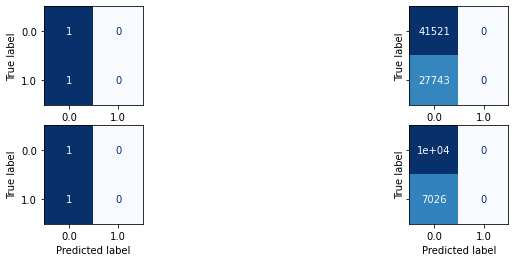

In [33]:
# Evaluate models based on Confusion Matrix and Classification Report
print("\n LOGISTIC REGRESSION:")
evaluate(lr_model)


 NAIVE-BAYES CLASSIFIER:
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89     41521
         1.0       0.87      0.77      0.81     27743

    accuracy                           0.86     69264
   macro avg       0.86      0.84      0.85     69264
weighted avg       0.86      0.86      0.86     69264

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87     10290
         1.0       0.84      0.75      0.79      7026

    accuracy                           0.84     17316
   macro avg       0.84      0.83      0.83     17316
weighted avg       0.84      0.84      0.84     17316



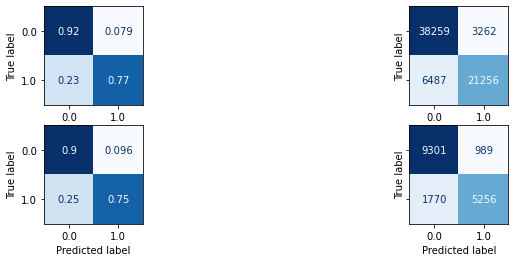

In [34]:
print("\n NAIVE-BAYES CLASSIFIER:")

# print classification report
print(classification_report(y_train_mms, nbc_model.predict(X_train_mms)))
print(classification_report(y_test_mms, nbc_model.predict(X_test_mms)))
    
# plot confusion matrix
fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(12, 4), sharey=True)
plot_confusion_matrix(nbc_model, X_train_mms, y_train_mms, cmap='Blues', ax=ax[0][0], normalize='true',colorbar=False)
plot_confusion_matrix(nbc_model, X_test_mms, y_test_mms, cmap='Blues', ax=ax[1][0], normalize='true',colorbar=False)
plot_confusion_matrix(nbc_model, X_train_mms, y_train_mms, cmap='Blues', ax=ax[0][1],colorbar=False)
plot_confusion_matrix(nbc_model, X_test_mms, y_test_mms, cmap='Blues', ax=ax[1][1],colorbar=False)


 LINEAR SUPPORT VECTOR:
              precision    recall  f1-score   support

         0.0       0.67      0.84      0.75     41521
         1.0       0.62      0.38      0.47     27743

    accuracy                           0.66     69264
   macro avg       0.65      0.61      0.61     69264
weighted avg       0.65      0.66      0.64     69264

              precision    recall  f1-score   support

         0.0       0.62      0.78      0.69     10290
         1.0       0.49      0.31      0.38      7026

    accuracy                           0.59     17316
   macro avg       0.55      0.54      0.53     17316
weighted avg       0.57      0.59      0.56     17316



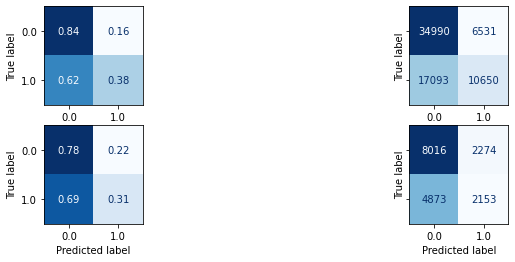

In [35]:
#evaluate(svc_model)
print("\n LINEAR SUPPORT VECTOR:")
evaluate(lsv_model)


 STOCHASTIC GRADIENT DESCENT:
              precision    recall  f1-score   support

         0.0       0.61      0.99      0.75     41521
         1.0       0.68      0.05      0.09     27743

    accuracy                           0.61     69264
   macro avg       0.64      0.52      0.42     69264
weighted avg       0.64      0.61      0.49     69264

              precision    recall  f1-score   support

         0.0       0.60      0.98      0.75     10290
         1.0       0.66      0.04      0.08      7026

    accuracy                           0.60     17316
   macro avg       0.63      0.51      0.41     17316
weighted avg       0.63      0.60      0.48     17316



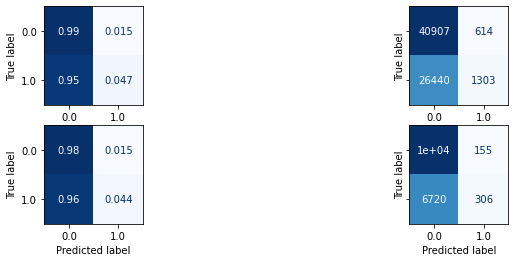

In [36]:
print("\n STOCHASTIC GRADIENT DESCENT:")
evaluate(sdg_model)


 MULTI-LAYER PERCEPTRON:
              precision    recall  f1-score   support

         0.0       0.67      0.83      0.74     41521
         1.0       0.61      0.40      0.48     27743

    accuracy                           0.66     69264
   macro avg       0.64      0.61      0.61     69264
weighted avg       0.65      0.66      0.64     69264

              precision    recall  f1-score   support

         0.0       0.62      0.77      0.69     10290
         1.0       0.49      0.32      0.39      7026

    accuracy                           0.59     17316
   macro avg       0.55      0.54      0.54     17316
weighted avg       0.57      0.59      0.57     17316



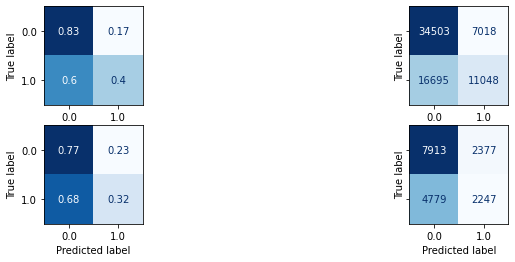

In [37]:
print("\n MULTI-LAYER PERCEPTRON:")
evaluate(mlp_model)

### Plot Precision-Recall and ROC curves

LOGISTIC REGRESSION:


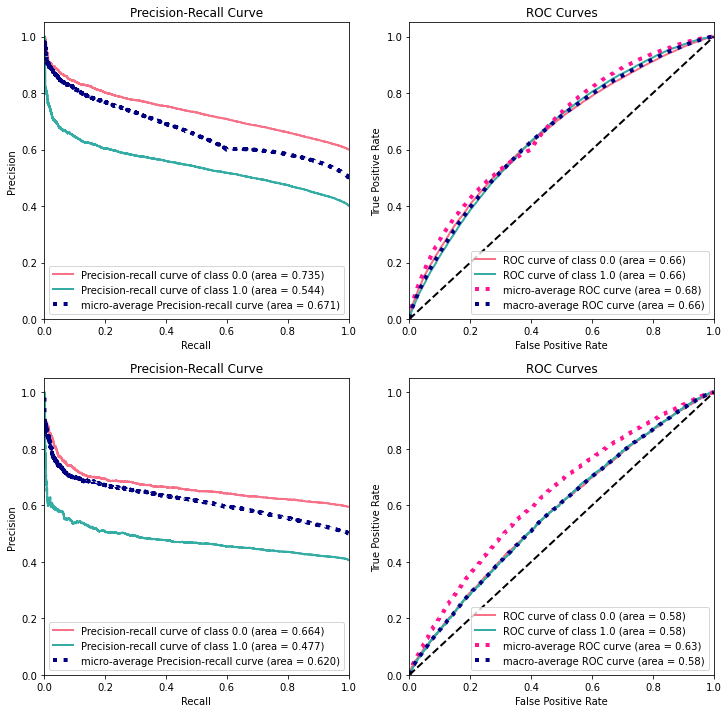

NAIVE-BAYES CLASSIFIER:


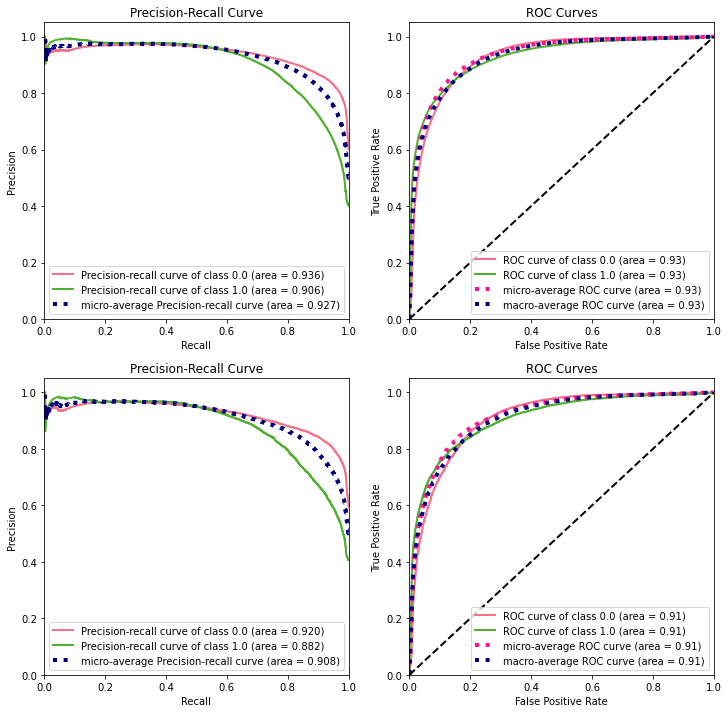

STOCHASTIC GRADIENT MODEL:


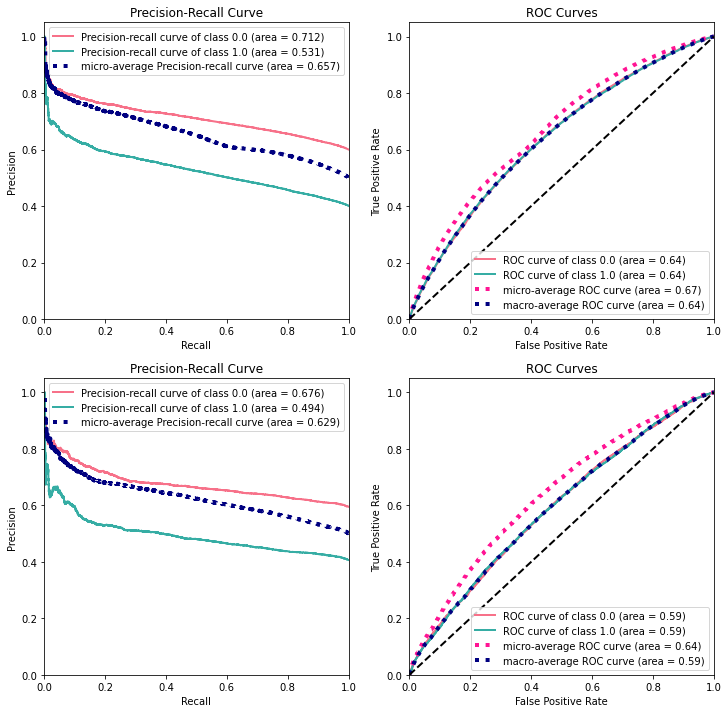

K NEAREST NEIGHBORS MODEL:


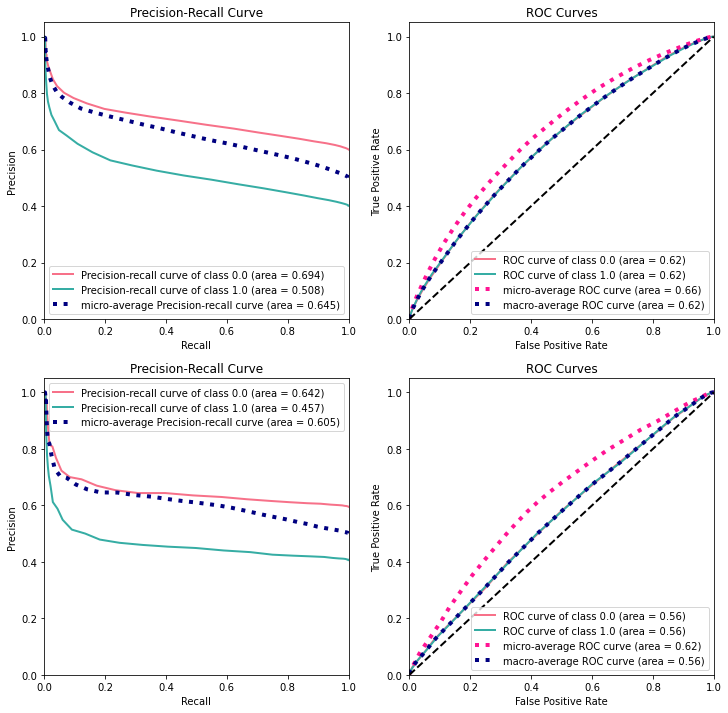

MULTI-LAYER PERCEPTRON MODEL:


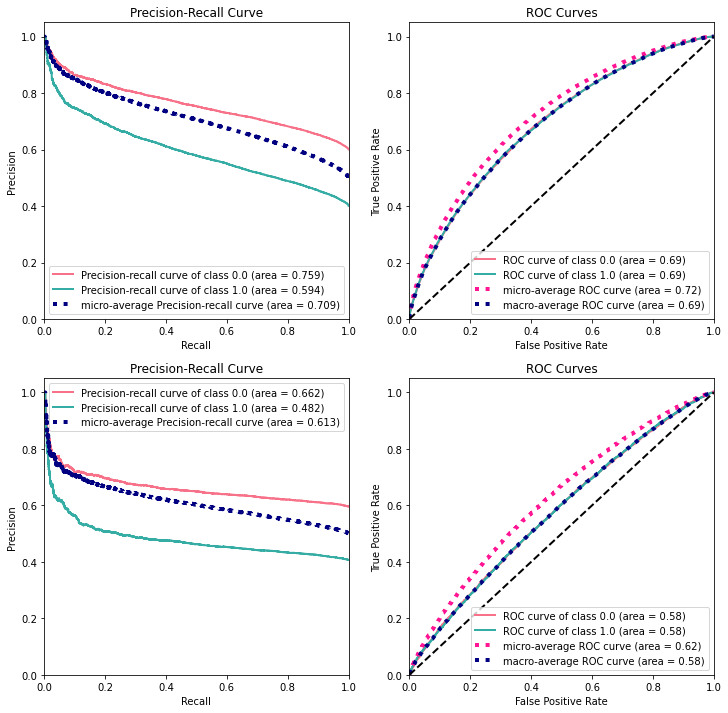

In [46]:
# Plot Precision-Recall and ROC curves

print("LOGISTIC REGRESSION:")
plot_curves(lr_model)

print("NAIVE-BAYES CLASSIFIER:")

fig, ax =plt.subplots(ncols = 2, nrows=2, figsize=(12, 12))
probabilities_train_nbc = nbc_model.predict_proba(X_train_mms)
probabilities_test_nbc = nbc_model.predict_proba(X_test_mms)

#plot train data
skplt.metrics.plot_precision_recall(y_train_mms, probabilities_train_nbc, cmap=cmap, ax=ax[0][0])
skplt.metrics.plot_roc(y_train_mms, probabilities_train_nbc, cmap=cmap, ax=ax[0][1])

#plot test data
skplt.metrics.plot_precision_recall(y_test_mms, probabilities_test_nbc, cmap=cmap, ax=ax[1][0])
skplt.metrics.plot_roc(y_test_mms, probabilities_test_nbc, cmap=cmap, ax=ax[1][1])

plt.show()
    

print("STOCHASTIC GRADIENT MODEL:")
plot_curves(sdg_model)

print("MULTI-LAYER PERCEPTRON MODEL:")
plot_curves(mlp_model)

# Conclusion after evaluating models:
The Naive_Bayes Classifier performed better than the other models.
The Training and Cross-validation scores are closer to the unseen Test data. This indicates the model was neither overfitted nor underfitted.
    
    Training Score = 0.85; Cross-validation score = 0.83; Test score = 0.84

Its Precision and Recall scores were also higher than those of other models. It could predict Class O and Class 1 more accurately than the other models. This could be observed in the Confusion Matrices as well. The f1 score conveys the balance between the precision and the recall. As expected, this is also higher for the Naive-Bayes classifier.
For unseen Test data: 
    
    Precision (class 0) = 0.84; Recall (class 0) = 0.95; f1-score (class 0) = 0.87
    Precision (class 1) = 0.84; Recall (class 1) = 0.75; f1-score (class 1) = 0.79
    Accuracy = 0.84


Visually, we can look at the shape of the Precision-Recall and ROC curves, and the areas under the curves to examine how the model performs.
    
    Area under Precision-recall curve (class 0) = 0.92
    Area under Precision-recall curve (class 1) = 0.882
    
    Area under ROC curve (class 0) = 0.91
    Area under ROC curve (class 1) = 0.91